<a href="https://colab.research.google.com/github/sitimarufatus/Exploration-and-Analysis-of-Indonesia-COVID-19-Data-using-Python/blob/main/Covid19_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import library yang dibutuhkan
import requests
import pandas as pd
import numpy as np
import json

Mengakses API covid19.go.id

Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

In [3]:
# get() function from the requests library to access the API
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

# status code [200]: Indicates that the request has succeeded
print(resp)

<Response [200]>


In [4]:
# headers attribute: To find out what metadata is stored
print(resp.headers)

{'Server': 'nginx', 'Date': 'Wed, 03 Nov 2021 12:37:11 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 03 Nov 2021 12:33:03 GMT', 'ETag': 'W/"6182817f-39e3c"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


Mengekstrak isi respon

In [5]:
# The json() method is a builtin JSON decoder to extract JSON type content
cov_id_raw = resp.json()
# print(cov_id_raw)

{'data': {'id': 1, 'jumlah_odp': 7500, 'jumlah_pdp': 0, 'total_spesimen': 47438975, 'total_spesimen_negatif': 37865431}, 'update': {'penambahan': {'jumlah_positif': 801, 'jumlah_meninggal': 24, 'jumlah_sembuh': 814, 'jumlah_dirawat': -37, 'tanggal': '2021-11-03', 'created': '2021-11-03 17:00:07'}, 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z', 'key': 1583107200000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 2}, 'jumlah_dirawat': {'value': 2}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_dirawat_kum': {'value': 2}}, {'key_as_string': '2020-03-03T00:00:00.000Z', 'key': 1583193600000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 0}, 'jumlah_dirawat': {'value': 0}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_d

In [6]:
# len() function to find out how many components are in the cov_id_row object
print('Length of cov_id_raw : %d.' %len(cov_id_raw))

# keys() method to find out what are the component names in the cov_id_raw object
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


Analisa Data

In [7]:
# focus on the cov_id_update object to answer the following questions
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-11-03
Jumlah penambahan kasus sembuh : 814
Jumlah penambahan kasus meninggal : 24
Jumlah total kasus positif hingga saat ini : 4246174
Jumlah total kasus meninggal hingga saat ini : 143481


COVID-19 di Jawa Barat

Mengakses API covid19.go.id

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json.

In [8]:
# get() function from the requests library to access the API
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')

# The json() method is a builtin JSON decoder to extract JSON type content
cov_jabar_raw = resp_jabar.json()

In [10]:
# method keys() pada cov_jabar_row untuk mengetahui nama-nama elemen utama
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [11]:
# get to know general information of COVID-19 case in Jawa Barat
print('\nJumlah total kasus COVID-19 di Jawa Barat               : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Jawa Barat               : 705948
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.082165.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 97.715696.2%


In [12]:
# get more complete information
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       610 non-null    int64
 1   KASUS                         610 non-null    int64
 2   MENINGGAL                     610 non-null    int64
 3   SEMBUH                        610 non-null    int64
 4   DIRAWAT_OR_ISOLASI            610 non-null    int64
 5   AKUMULASI_KASUS               610 non-null    int64
 6   AKUMULASI_SEMBUH              610 non-null    int64
 7   AKUMULASI_MENINGGAL           610 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  610 non-null    int64
dtypes: int64(9)
memory usage: 43.0 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583193600000      1  ...                    1                             0
1  1583280000000 

Menjinakkan Data

In [13]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') #delete the column containing the cumulative value
                                               or item.startswith('DIRAWAT_OR_ISOLASI')]) #delete the column DiRAWAT_OR_ISOLASI
                           .rename(columns=str.lower) #change the writing format of all columns to lowercase
                           .rename(columns={'kasus': 'kasus_baru'}) #rename kasus column to kasus_baru
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns') #perbaiki tipe data kolom tanggal
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


Menunjukkan pertumbuhan covid memalui visualisasi

In [14]:
# import library yang dibutuhkan
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<Figure size 432x288 with 0 Axes>

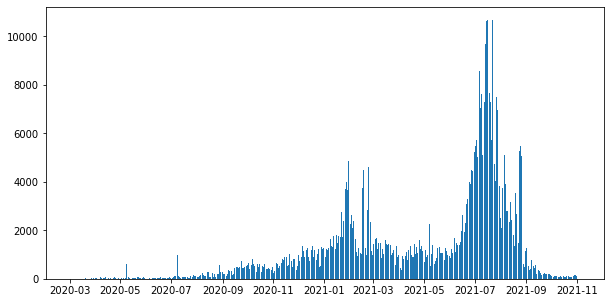

In [15]:
# geometric shapes used in bar charts (.bar())
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

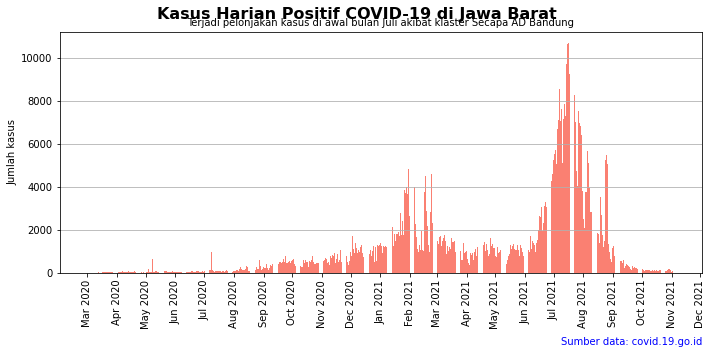

In [16]:
# provide information on graphs
# make a graph of positive case
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

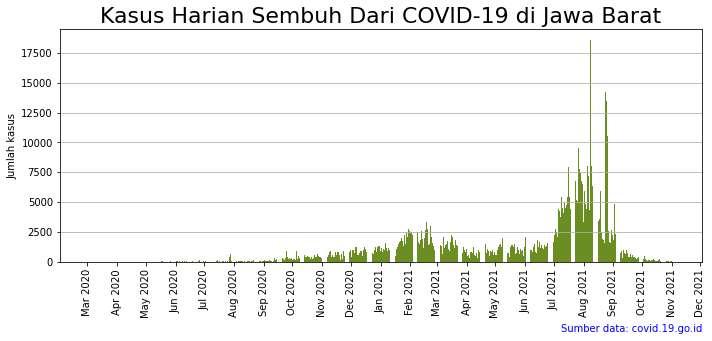

In [17]:
# make a graph of recovering cases
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

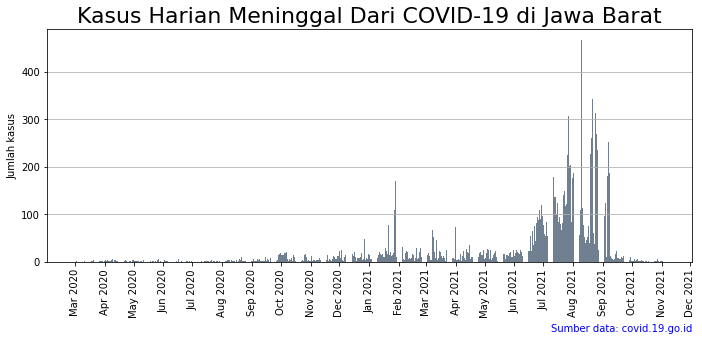

In [18]:
# make a graph of death cases
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Menggali Lebih Dalam

Apakah Pekan ini Lebih Baik?

In [19]:
# Predefined code, first to set the 'tanggal' column in cov_jabar_tidy as an index. 
# Then apply the method on the time series in pandas, resampling per week and using the sum aggregation. 
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
# to extract week of year information using weekofyear and for year using year
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x:x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

# use the info() and .head() methods to inspect the data
print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     88 non-null     int64
 1   pekan_ke  88 non-null     int64
 2   jumlah    88 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


Menjawab Pertanyaan

In [20]:
# Create a new column named jumlah_pekanlalu
# Replacing the NaN value in the jumlah_pekanlalu column with a 0 value
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)

# Do a comparison between the jumlah column and the jumlah_pekanlalu column
# The comparison results are stored in a new column named lebih_baik
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


Membuat Bar Chart

membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 432x288 with 0 Axes>

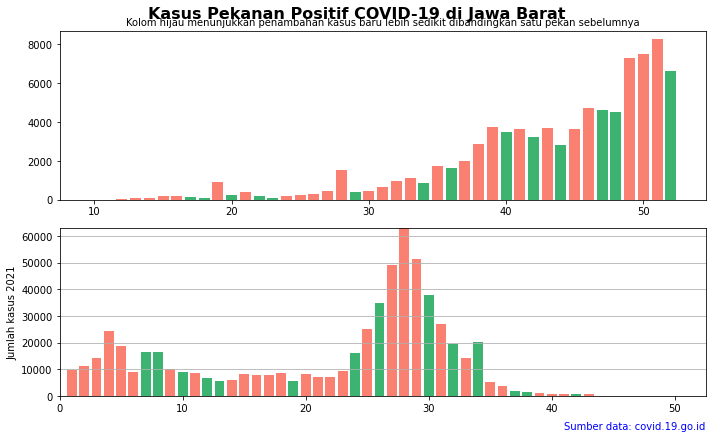

In [21]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
						 figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', 
			 y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes): 
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
		x='pekan_ke', height='jumlah',
		color=['mediumseagreen' if x is True else 'salmon' 
			  	  for x in cov_jabar_pekanan['lebih_baik']])
    if i == 0:
		    ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', 
               fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
		    ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
			      ha='right', transform=ax.transAxes)
					  
ax.set_xlim([0, 52.5])
ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
ax.grid(axis='y')
					  
plt.tight_layout()
plt.show()

Pola dan Dinamika

Hingga saat ini ada berapa kasus yang masih aktif?

In [22]:
# number of active cases = number of positive accumulations - number of accumulated recoveries - number of accumulated deaths
# using the cumsum() method to calculate the accumulated value of a numeric vector
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())


       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
605 2021-10-29             1270            689621                14695
606 2021-10-30             1377            689656                14695
607 2021-10-31             1423            689709                14696
608 2021-11-01             1369            689808                14697
609 2021-11-02             1430            689819                14699


Membuat Line Chart

<Figure size 432x288 with 0 Axes>

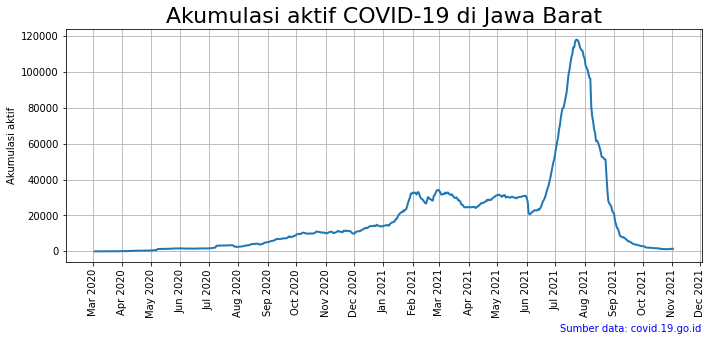

In [23]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Kabar Buruk dan Kabar Baik

membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal

Menggunakan data frame cov_jabar_akumulasi, dengan kolom bertipe datetime diset menjadi index sehingga kita memiliki time series dataframe. Kemudian kita secara langsung dapat melakukan line plot dan memilih warna garis yang sesuai untuk membedakan

<Figure size 432x288 with 0 Axes>

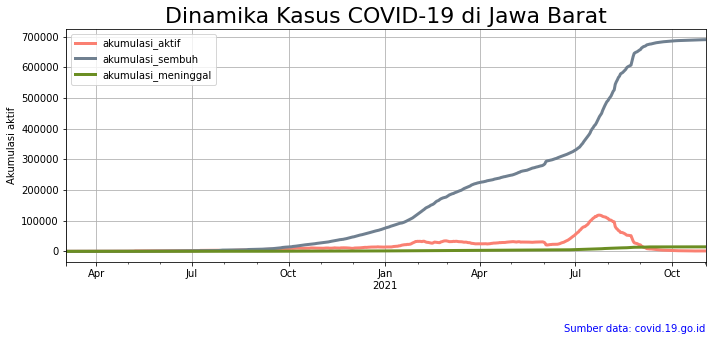

In [24]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						   color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
			fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
	   ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()